In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import json_normalize
from tqdm import tqdm

In [2]:
# Carga de datos
match_df = pd.read_pickle('C:\\Users\\Facu\\PycharmProjects\\Proyecto_Final_IA\\proyecto_final\\data\\match_data_version2.pickle')
winner_df =  pd.read_pickle('C:\\Users\\Facu\\PycharmProjects\\Proyecto_Final_IA\\proyecto_final\\data\\match_loser_data_version1.pickle')
loser_df = pd.read_pickle('C:\\Users\\Facu\\PycharmProjects\\Proyecto_Final_IA\\proyecto_final\\data\\match_winner_data_version1.pickle')

Observamos que el dataset contiene partidas únicamente de la temporada 13, por lo que esta columna puede ser excluida.

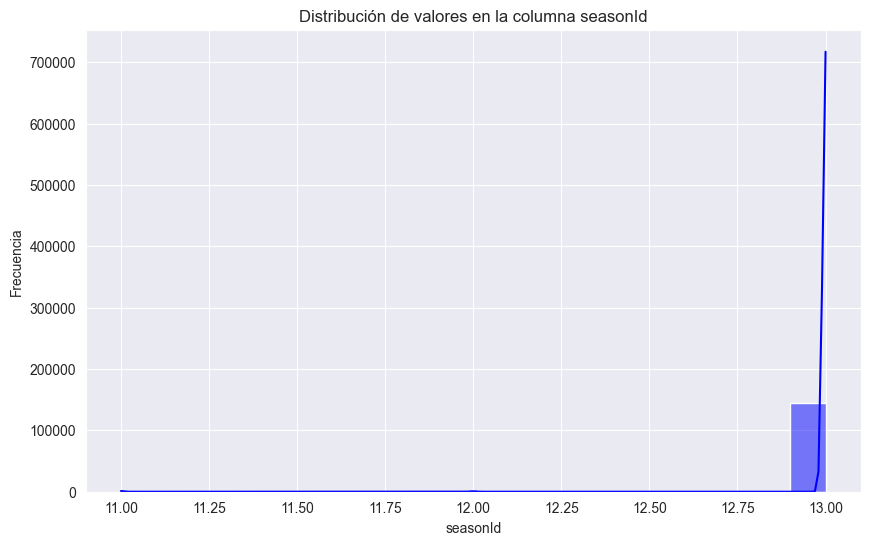

In [3]:
columna_interes = 'seasonId'
data_columna = match_df[columna_interes]

# Visualizar la distribución de valores utilizando un histograma
plt.figure(figsize=(10, 6))
sns.histplot(data_columna, kde=True, bins=20, color='blue')
plt.title(f'Distribución de valores en la columna {columna_interes}')
plt.xlabel(columna_interes)
plt.ylabel('Frecuencia')
plt.show()

In [4]:
# Informacion de los dataframes
match_df.info()
winner_df.info()
loser_df.info()
match_df['participants'].iloc[0][0]['timeline']
json_normalize(match_df['participants'].iloc[0][0])


<class 'pandas.core.frame.DataFrame'>
Index: 145796 entries, 0 to 0
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   gameCreation           145796 non-null  float64
 1   gameDuration           145796 non-null  float64
 2   gameId                 145796 non-null  int64  
 3   gameMode               145796 non-null  object 
 4   gameType               145796 non-null  object 
 5   gameVersion            145796 non-null  object 
 6   mapId                  145796 non-null  float64
 7   participantIdentities  145796 non-null  object 
 8   participants           145796 non-null  object 
 9   platformId             145796 non-null  object 
 10  queueId                145796 non-null  float64
 11  seasonId               145796 non-null  float64
 12  status.message         0 non-null       object 
 13  status.status_code     0 non-null       float64
 14  teams                  145796 non-null  object

,participantId,teamId,championId,spell1Id,spell2Id,stats.participantId,stats.win,stats.item0,stats.item1,stats.item2,...,timeline.creepsPerMinDeltas.10-20,timeline.creepsPerMinDeltas.0-10,timeline.xpPerMinDeltas.10-20,timeline.xpPerMinDeltas.0-10,timeline.goldPerMinDeltas.10-20,timeline.goldPerMinDeltas.0-10,timeline.damageTakenPerMinDeltas.10-20,timeline.damageTakenPerMinDeltas.0-10,timeline.role,timeline.lane
0,1,100,7,1,4,1,False,2033,3285,3108,...,6.2,6.1,473.5,386.6,277,315.6,906,473.8,DUO_CARRY,MIDDLE


In [5]:
# Modificamos los nombres de las columnas para evitar confusiones agregando "_winner" y "_loser"
winner_df = winner_df.rename(columns={'win': 'win_winner', 'firstBlood': 'firstBlood_winner', 'firstTower': 'firstTower_winner', 'firstInhibitor': 'firstInhibitor_winner', 'firstBaron': 'firstBaron_winner', 'firstDragon': 'firstDragon_winner', 'firstRiftHerald': 'firstRiftHerald_winner', 'towerKills': 'towerKills_winner', 'inhibitorKills': 'inhibitorKills_winner', 'baronKills': 'baronKills_winner', 'dragonKills': 'dragonKills_winner', 'riftHeraldKills': 'riftHeraldKills_winner', 'bans': 'bans_winner'})
loser_df = loser_df.rename(columns={'win': 'win_loser', 'firstBlood': 'firstBlood_loser', 'firstTower': 'firstTower_loser', 'firstInhibitor': 'firstInhibitor_loser', 'firstBaron': 'firstBaron_loser', 'firstDragon': 'firstDragon_loser', 'firstRiftHerald': 'firstRiftHerald_loser', 'towerKills': 'towerKills_loser', 'inhibitorKills': 'inhibitorKills_loser', 'baronKills': 'baronKills_loser', 'dragonKills': 'dragonKills_loser', 'riftHeraldKills': 'riftHeraldKills_loser', 'bans': 'bans_loser'})


Eliminamos gameCreation, gameType, gameVersion, mapId, platformId, queueId, seasonId ya que varias tienen un valor único o no son relevantes para el análisis.

In [7]:
match_df.drop(['gameCreation', 'gameType', 'gameVersion', 'mapId',
                    'platformId', 'queueId', 'seasonId', 'status.message', 'status.status_code'], axis=1, inplace=True)

Tambien quitamos las partidas que no sean del modo de juego CLASSIC.

In [8]:
indexList = [i for i in match_df[match_df.gameMode != 'CLASSIC'].index if i != 0]

print('Dropping non-classic games...')
match_df.drop(indexList, inplace=True)
match_df.drop(['gameMode'], axis=1, inplace=True)

print("Succeed!")

Dropping non-classic games...
Succeed!


Eliminamos datos que no son de utilidad:
* participants: [spell1Id, spell2Id]
* stats:
[combatPlayerScore, objectivePlayerScore, totalPlayerScore, totalScoreRank, playerScore0, playerScore1, playerScore2,playerScore3, playerScore4, playerScore5, playerScore6, playerScore7, playerScore8, playerScore9, perk0, perk0Var1, perk0Var2, perk0Var3, perk1, perk1Var1, perk1Var2, perk1Var3, perk2, perk2Var1, perk2Var2,perk2Var3, perk3, perk3Var1, perk3Var2, perk3Var3, perk4, perk4Var1, perk4Var2, perk4Var3, perk5, perk5Var1, perk5Var2, perk5Var3, perkPrimaryStyle, perkSubStyle, statPerk0, statPerk1, statPerk2]
* timeline: ['role', 'lane'] las colocamos directamente en 'participants'
* Algunos participantes no tienen 'stats', los eliminamos ya que no nos sirven.

In [9]:
entriesToRemoveMain = ['spell1Id', 'spell2Id']
entriesToRemoveStats = ['combatPlayerScore', 'objectivePlayerScore', 'totalPlayerScore',
                        'totalScoreRank', 'playerScore0', 'playerScore1', 'playerScore2',
                        'playerScore3', 'playerScore4', 'playerScore5', 'playerScore6',
                        'playerScore7', 'playerScore8', 'playerScore9', 'perk0',
                        'perk0Var1', 'perk0Var2', 'perk0Var3', 'perk1', 'perk1Var1',
                        'perk1Var2', 'perk1Var3', 'perk2', 'perk2Var1', 'perk2Var2',
                        'perk2Var3', 'perk3', 'perk3Var1', 'perk3Var2', 'perk3Var3',
                        'perk4', 'perk4Var1', 'perk4Var2', 'perk4Var3', 'perk5',
                        'perk5Var1', 'perk5Var2', 'perk5Var3', 'perkPrimaryStyle',
                        'perkSubStyle', 'statPerk0', 'statPerk1', 'statPerk2']

def deleteKeysParticipants(participantsData):
    for participant in participantsData:
        for mainKey in entriesToRemoveMain:
            participant.pop(mainKey, None)
        for statsKey in entriesToRemoveStats:
            try:
                participant['stats'].pop(statsKey, None)
            except:
                participantsData = [p for p in participantsData if p != participant]
                break

        roleValue = participant['timeline']['role']
        laneValue = participant['timeline']['lane']
        participant.pop('timeline', None)
        participant['role'] = roleValue
        participant['lane'] = laneValue

    return participantsData

tqdm.pandas()

match_df['participants'].progress_apply(lambda x: deleteKeysParticipants(x))

print("Succeed!")

100%|██████████| 135965/135965 [00:10<00:00, 12631.34it/s]

Succeed!


Eliminamos también a los participantes que no tienen un summonerId

In [10]:
def is_summoner_id_misssing(participantsData):
    for participant in participantsData:
        if 'summonerId' not in participant['player']:
            return False
    return True

match_df = match_df[match_df.progress_apply(lambda row: is_summoner_id_misssing(row['participantIdentities']), axis=1)]

100%|██████████| 135965/135965 [00:01<00:00, 76437.73it/s]


Quitamos las partidas que no tienen una cantidad de participantes igual a 10.

In [11]:
def is_number_participant_identities_ten(participantsData, gamID):
    if len(participantsData) != 10:
        return False
    return True

def is_number_participant_ten(participantsData):
    if len(participantsData) != 10:
        return False
    return True


match_df = match_df[match_df.progress_apply(lambda row: is_number_participant_identities_ten(row['participantIdentities'], row['gameId']), axis=1)]
match_df = match_df[match_df.progress_apply(lambda row: is_number_participant_ten(row['participants']), axis=1)]

100%|██████████| 135334/135334 [00:01<00:00, 92449.18it/s] 


Removimos datos irrelevantes de 'participantIdentities':
* player: 
    - platformId (el dataset es sólo de Korea)
    - accountId (no nos interesa este dato)
    - currentPlatformId (el dataset es sólo de Korea)
    - currentAccountId
    - matchHistoryUri
    - profileIcon

In [12]:
entriesToRemovePlayer = ['platformId', 'accountId', 'currentPlatformId',
                         'currentAccountId', 'matchHistoryUri', 'profileIcon']

def deleteKeysParticipantIdentities(participantsData):
    for participant in participantsData:
        for playerKey in entriesToRemovePlayer:
            participant['player'].pop(playerKey, None)
    return participantsData

match_df['participantIdentities'].progress_apply(lambda x: deleteKeysParticipantIdentities(x))

print("Succeed!")

100%|██████████| 135334/135334 [00:01<00:00, 108664.35it/s]

Succeed!


Finalmente quitamos las filas con 'gameId' duplicados

In [13]:
match_df = match_df.drop_duplicates(subset=['gameId'])

In [14]:
match_df_copy = match_df.copy()

In [15]:
entriesToRemovePlayer = [  'win', 'item0', 'item1', 'item2','item3','item4','item5','item6','kills','deaths','assists','largestKillingSpree','largestMultiKill',
  'killingSprees',
  'longestTimeSpentLiving',
  'doubleKills',
  'tripleKills',
  'quadraKills',
  'pentaKills',
  'unrealKills',
  'totalDamageDealt',
  'magicDamageDealt',
  'physicalDamageDealt',
  'trueDamageDealt',
  'largestCriticalStrike',
  'totalDamageDealtToChampions',
  'magicDamageDealtToChampions',
  'physicalDamageDealtToChampions',
  'trueDamageDealtToChampions',
  'totalHeal',
  'totalUnitsHealed',
  'damageSelfMitigated',
  'damageDealtToObjectives',
  'damageDealtToTurrets',
  'visionScore',
  'timeCCingOthers',
  'totalDamageTaken',
  'magicalDamageTaken',
  'physicalDamageTaken',
  'trueDamageTaken',
  'goldEarned',
  'goldSpent',
  'turretKills',
  'inhibitorKills',
  'totalMinionsKilled',
  'neutralMinionsKilled',
  'neutralMinionsKilledTeamJungle',
  'neutralMinionsKilledEnemyJungle',
  'totalTimeCrowdControlDealt',
  'champLevel',
  'visionWardsBoughtInGame',
  'sightWardsBoughtInGame']

def deletePlayerStats(participantsData):
    for participant in participantsData:
        for playerStats in entriesToRemovePlayer: 
            participant['stats'].pop(playerStats, None)
    return participantsData
    

match_df['participants'].progress_apply(lambda x: deletePlayerStats(x))

print("Succeed!")

100%|██████████| 135298/135298 [00:09<00:00, 13712.78it/s]

Succeed!


In [16]:
entriesToRemovePlayer = ['firstInhibitor', 'towerKills', 'inhibitorKills', 'baronKills', 'dragonKills', 'vilemawKills', 'riftHeraldKills']

def deleteTeamsKeys(teamsData):
    for team in teamsData:
        for teamKey in entriesToRemovePlayer:
            team.pop(teamKey, None)
    return teamsData

match_df['teams'].progress_apply(lambda x: deleteTeamsKeys(x))

print("Succeed!")

100%|██████████| 135298/135298 [00:00<00:00, 342690.01it/s]

Succeed!


A continuación tenemos el formato del dataset procesado

In [17]:
match_df.head()
# Participant data in participants list per game
match_df['participants'].iloc[0][0]

{'participantId': 1,
 'teamId': 100,
 'championId': 7,
 'stats': {'participantId': 1,
  'wardsPlaced': 6,
  'wardsKilled': 1,
  'firstBloodKill': True,
  'firstBloodAssist': False,
  'firstTowerKill': False,
  'firstTowerAssist': False,
  'firstInhibitorKill': False,
  'firstInhibitorAssist': False},
 'role': 'DUO_CARRY',
 'lane': 'MIDDLE'}

In [18]:
match_df['participantIdentities'].iloc[0][0]

{'participantId': 1,
 'player': {'summonerName': '쪼렙이다말로하자',
  'summonerId': 'YTMZt7CQ7cHXiADp1ZtI1GjNHdAE_HQbbSxxq_gllWinqQ'}}

In [19]:
match_df['teams'].iloc[0][0]

{'teamId': 100,
 'win': 'Fail',
 'firstBlood': True,
 'firstTower': False,
 'firstBaron': False,
 'firstDragon': False,
 'firstRiftHerald': False,
 'dominionVictoryScore': 0,
 'bans': [{'championId': -1, 'pickTurn': 1},
  {'championId': 80, 'pickTurn': 2},
  {'championId': 875, 'pickTurn': 3},
  {'championId': 555, 'pickTurn': 4},
  {'championId': 412, 'pickTurn': 5}]}

In [20]:
match_df = pd.read_csv('D:\\Facultad\\3_año\\Inteligencia_Artificial_1\\Dataset\\matchDataClean.csv')
#Serializamos el data frame
match_df['teams'] = match_df['teams'].apply(eval)  # Convierte la cadena JSON a una lista de diccionarios

In [21]:
# agrega las columnas: firstBloodTeam1', 'firstTowerTeam1,'firstBaronTeam1','firstDragonTeam1', 'firstRiftHeraldTeam1', 'ban1Team1', 'ban2Team1', 'ban3Team1', 'ban4Team1', 'ban5Team1', champ1Team1, champ2Team1, champ3Team1, champ4Team1, champ5Team1, 'firstBloodTeam2', 'firstTowerTeam2', 'firstBaronTeam2', 'firstDragonTeam2', 'firstRiftHeraldTeam2', 'ban1Team2', 'ban2Team2', 'ban3Team2', 'ban4Team2', 'ban5Team2', champ1Team2, champ2Team2, champ3Team2, champ4Team2, champ5Team2.
match_df['firstBloodTeam1'] = [None for _ in range(len(match_df))]
match_df['firstTowerTeam1'] = [None for _ in range(len(match_df))]
match_df['firstBaronTeam1'] = [None for _ in range(len(match_df))]
match_df['firstDragonTeam1'] = [None for _ in range(len(match_df))]
match_df['firstRiftHeraldTeam1'] = [None for _ in range(len(match_df))]
match_df['ban1Team1'] = [None for _ in range(len(match_df))]
match_df['ban2Team1'] = [None for _ in range(len(match_df))]
match_df['ban3Team1'] = [None for _ in range(len(match_df))]
match_df['ban4Team1'] = [None for _ in range(len(match_df))]
match_df['ban5Team1'] = [None for _ in range(len(match_df))]
match_df['champ1Team1'] = [None for _ in range(len(match_df))]
match_df['champ2Team1'] = [None for _ in range(len(match_df))]
match_df['champ3Team1'] = [None for _ in range(len(match_df))]
match_df['champ4Team1'] = [None for _ in range(len(match_df))]
match_df['champ5Team1'] = [None for _ in range(len(match_df))]
match_df['firstBloodTeam2'] = [None for _ in range(len(match_df))]
match_df['firstTowerTeam2'] = [None for _ in range(len(match_df))]
match_df['firstBaronTeam2'] = [None for _ in range(len(match_df))]
match_df['firstDragonTeam2'] = [None for _ in range(len(match_df))]
match_df['firstRiftHeraldTeam2'] = [None for _ in range(len(match_df))]
match_df['ban1Team2'] = [None for _ in range(len(match_df))]
match_df['ban2Team2'] = [None for _ in range(len(match_df))]
match_df['ban3Team2'] = [None for _ in range(len(match_df))]
match_df['ban4Team2'] = [None for _ in range(len(match_df))]
match_df['ban5Team2'] = [None for _ in range(len(match_df))]
match_df['champ1Team2'] = [None for _ in range(len(match_df))]
match_df['champ2Team2'] = [None for _ in range(len(match_df))]
match_df['champ3Team2'] = [None for _ in range(len(match_df))]
match_df['champ4Team2'] = [None for _ in range(len(match_df))]
match_df['champ5Team2'] = [None for _ in range(len(match_df))]

In [24]:
# Busca los valores de las columnas anteriores en la columna 'teams' y los agrega en las columnas correspondientes
def get_team_data(teams, n):
    team1 = None  
    team2 = None  
    for team in teams:
        if team['teamId'] == 100:
            team1 = team
        else:
            team2 = team
    match_df.at[match_df.index[n], 'firstBloodTeam1'] = team1.get('firstBlood', None)
    match_df.at[match_df.index[n], 'firstTowerTeam1'] = team1.get('firstTower', None)
    match_df.at[match_df.index[n], 'firstBaronTeam1'] = team1.get('firstBaron', None)
    match_df.at[match_df.index[n], 'firstDragonTeam1'] = team1.get('firstDragon', None)
    match_df.at[match_df.index[n], 'firstRiftHeraldTeam1'] = team1.get('firstRiftHerald', None)
    
    if team1['bans']:
        match_df.at[match_df.index[n], 'ban1Team1'] = team1['bans'][0].get('championId', None)
        match_df.at[match_df.index[n], 'ban2Team1'] = team1['bans'][1].get('championId', None)
        match_df.at[match_df.index[n], 'ban3Team1'] = team1['bans'][2].get('championId', None)
        match_df.at[match_df.index[n], 'ban4Team1'] = team1['bans'][3].get('championId', None)
        match_df.at[match_df.index[n], 'ban5Team1'] = team1['bans'][4].get('championId', None)

    match_df.at[match_df.index[n], 'champ1Team1'] = team1.get('championId', None)
    match_df.at[match_df.index[n], 'champ2Team1'] = team1.get('championId', None)
    match_df.at[match_df.index[n], 'champ3Team1'] = team1.get('championId', None)
    match_df.at[match_df.index[n], 'champ4Team1'] = team1.get('championId', None)
    match_df.at[match_df.index[n], 'champ5Team1'] = team1.get('championId', None)
    match_df.at[match_df.index[n], 'firstBloodTeam2'] = team2.get('firstBlood', None)
    match_df.at[match_df.index[n], 'firstTowerTeam2'] = team2.get('firstTower', None)
    match_df.at[match_df.index[n], 'firstBaronTeam2'] = team2.get('firstBaron', None)
    match_df.at[match_df.index[n], 'firstDragonTeam2'] = team2.get('firstDragon', None)
    match_df.at[match_df.index[n], 'firstRiftHeraldTeam2'] = team2.get('firstRiftHerald', None)
    
    if team2['bans']:
        match_df.at[match_df.index[n], 'ban1Team2'] = team2['bans'][0].get('championId', None)
        match_df.at[match_df.index[n], 'ban2Team2'] = team2['bans'][1].get('championId', None)
        match_df.at[match_df.index[n], 'ban3Team2'] = team2['bans'][2].get('championId', None)
        match_df.at[match_df.index[n], 'ban4Team2'] = team2['bans'][3].get('championId', None)
        match_df.at[match_df.index[n], 'ban5Team2'] = team2['bans'][4].get('championId', None)

    match_df.at[match_df.index[n], 'champ1Team2'] = team2.get('championId', None)
    match_df.at[match_df.index[n], 'champ2Team2'] = team2.get('championId', None)
    match_df.at[match_df.index[n], 'champ3Team2'] = team2.get('championId', None)
    match_df.at[match_df.index[n], 'champ4Team2'] = team2.get('championId', None)
    match_df.at[match_df.index[n], 'champ5Team2'] = team2.get('championId', None)
    return n+1

match_df['index'] = match_df.index
match_df.apply(lambda row: get_team_data(row['teams'], row['index']), axis=1)  # Aplica la función a cada fila del dataframe
match_df.drop('index', axis=1, inplace=True)  # Elimina la columna temporal 'index'


In [25]:
match_df['participants'] = match_df['participants'].apply(eval)

In [26]:
# rellena las columas de campeones con el ID del campeón que seleccionó cada jugador
def get_champ_data(participants, n):
    for participant in participants:
        if participant['teamId'] == 100:
            if participant['participantId'] == 1:
                match_df.at[match_df.index[n], 'champ1Team1'] = participant.get('championId', None)
            elif participant['participantId'] == 2:
                match_df.at[match_df.index[n], 'champ2Team1'] = participant.get('championId', None)
            elif participant['participantId'] == 3:
                match_df.at[match_df.index[n], 'champ3Team1'] = participant.get('championId', None)
            elif participant['participantId'] == 4:
                match_df.at[match_df.index[n], 'champ4Team1'] = participant.get('championId', None)
            elif participant['participantId'] == 5:
                match_df.at[match_df.index[n], 'champ5Team1'] = participant.get('championId', None)
        else:
            if participant['participantId'] == 6:
                match_df.at[match_df.index[n], 'champ1Team2'] = participant.get('championId', None)
            elif participant['participantId'] == 7:
                match_df.at[match_df.index[n], 'champ2Team2'] = participant.get('championId', None)
            elif participant['participantId'] == 8:
                match_df.at[match_df.index[n], 'champ3Team2'] = participant.get('championId', None)
            elif participant['participantId'] == 9:
                match_df.at[match_df.index[n], 'champ4Team2'] = participant.get('championId', None)
            elif participant['participantId'] == 10:
                match_df.at[match_df.index[n], 'champ5Team2'] = participant.get('championId', None)
    return n+1

match_df['index'] = match_df.index
match_df.apply(lambda row: get_champ_data(row['participants'], row['index']), axis=1)
match_df.drop('index', axis=1, inplace=True)  # Elimina la columna temporal 'index'

In [27]:
# Elimina las filas con valores nulos
match_df.dropna(inplace=True)

In [28]:
def get_win(team_list):
    wins = [team.get('win', None) for team in team_list]
    return wins

# Aplica la función a la columna 'teams' para obtener la columna 'win'
wins = match_df['teams'].apply(get_win)

In [33]:
win_team1 = [win[0] for win in wins]
win_team2 = [win[1] for win in wins]

# convierte win_team1 y win_team2 en enteros
win_team1 = [1 if win == 'Win' else 0 for win in win_team1]
win_team2 = [1 if win == 'Win' else 0 for win in win_team2]

In [40]:
# agrega win_team1 y win_team2 a un nuevo dataframe
wins = pd.DataFrame({'win_team1': win_team1, 'win_team2': win_team2})

In [34]:
# Elimina las columas 'participantsIdentities', 'participants', y 'teams'
match_df.drop('participantIdentities', axis=1, inplace=True)
match_df.drop('participants', axis=1, inplace=True)
match_df.drop('teams', axis=1, inplace=True)

In [35]:
match_df.drop('gameId', axis=1, inplace=True)

In [38]:
match_df.head()

,gameDuration,firstBloodTeam1,firstTowerTeam1,firstBaronTeam1,firstDragonTeam1,firstRiftHeraldTeam1,ban1Team1,ban2Team1,ban3Team1,ban4Team1,...,ban1Team2,ban2Team2,ban3Team2,ban4Team2,ban5Team2,champ1Team2,champ2Team2,champ3Team2,champ4Team2,champ5Team2
0,1323.0,1,0,0,0,0,-1,80,875,555,...,523,429,142,62,-1,235,81,127,84,421
1,1317.0,0,0,0,1,1,523,429,60,2,...,875,432,76,2,64,235,126,517,58,15
2,932.0,0,0,0,0,0,110,142,875,432,...,350,4,105,875,80,12,429,7,64,82
3,2098.0,0,0,1,1,0,523,412,429,80,...,81,110,523,429,60,875,41,21,154,157
4,2344.0,1,1,1,1,1,30,429,523,235,...,523,106,80,110,105,62,2,517,142,350


In [37]:
# Convierte las columnas a enteros
match_df['firstBloodTeam1'] = match_df['firstBloodTeam1'].map({True: 1, False: 0})
match_df['firstBloodTeam2'] = match_df['firstBloodTeam2'].map({True: 1, False: 0})
match_df['firstTowerTeam1'] = match_df['firstTowerTeam1'].map({True: 1, False: 0})
match_df['firstTowerTeam2'] = match_df['firstTowerTeam2'].map({True: 1, False: 0})
match_df['firstBaronTeam1'] = match_df['firstBaronTeam1'].map({True: 1, False: 0})
match_df['firstBaronTeam2'] = match_df['firstBaronTeam2'].map({True: 1, False: 0})
match_df['firstDragonTeam1'] = match_df['firstDragonTeam1'].map({True: 1, False: 0})
match_df['firstDragonTeam2'] = match_df['firstDragonTeam2'].map({True: 1, False: 0})
match_df['firstRiftHeraldTeam1'] = match_df['firstRiftHeraldTeam1'].map({True: 1, False: 0})
match_df['firstRiftHeraldTeam2'] = match_df['firstRiftHeraldTeam2'].map({True: 1, False: 0})

In [41]:
#guardamos en archivo csv
match_df.to_csv('matchDataProcessed.csv', index=False, encoding='utf-8')
wins.to_csv('matchDataWins.csv', index=False, encoding='utf-8')